In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Birds Migration Data

In [2]:
birds = pd.read_csv('../../data/bird_tracking.csv')

In [3]:
birds.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


## Exercise 1
The migration data of which birds (`bird_name`s) are in the tracking dataset?

In [4]:
# TODO
unique_names = birds.bird_name.unique()
unique_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

## Exercise 2
Draw a basic plot of the track(x-axis: longitude, y-axis: latitude) of each bird:

- The `title` of the plot should be `Bird Migration`.
- The axes should be named.
- A legend should show to which bird the single tracks belong.

In [5]:
#birds[birds.bird_name=='Eric']
plt.figure(figsize=(12,10))

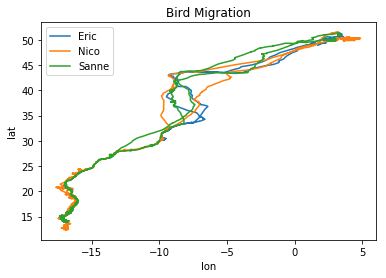

In [6]:
# TODO

for name in unique_names:
    bird = birds[birds.bird_name==name]
    plt.plot(bird.longitude,bird.latitude, label=name)
    
plt.legend()
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Bird Migration');

### Exercise 3

Draw the flight route on [Cartopy](http://scitools.org.uk/cartopy/)

```bash
conda install -c scitools cartopy=0.15.0
# or (if former does not work)
conda install -c conda-forge cartopy=0.15.1
```

In [7]:
import cartopy.crs as ccrs

### Exercise 3.1

Draw the flight route with [PlateCarree-Projection](http://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html#adding-data-to-the-map)

See `TODO`s, where to change/insert your code.

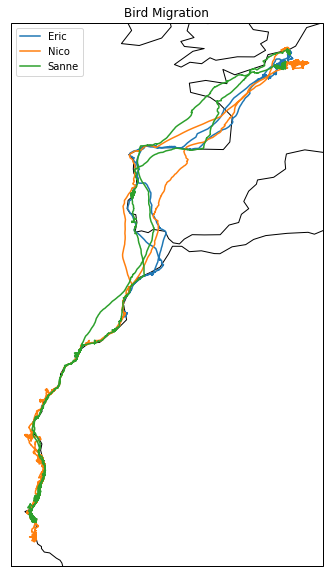

In [8]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# TODO 1: comment in/out and see, what happens
# ax.set_extent((-25,20,52,10))

# TODO 2: draw the single tracks with title and legend as in Exercise 2
for name in unique_names:
    bird = birds[birds.bird_name==name]
    plt.plot(bird.longitude,bird.latitude, label=name, transform=ccrs.Geodetic())
    
plt.legend()
plt.title('Bird Migration');

### Exercise 3.2

Draw the flight route with [Mercator-Projection](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy.crs.Mercator)

Use [Features](http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) to show
- LAND
- OCEAN
- COASTLINE
- BORDERS
- LAKES
- RIVERS

See `TODO`s, where to change/insert your code.

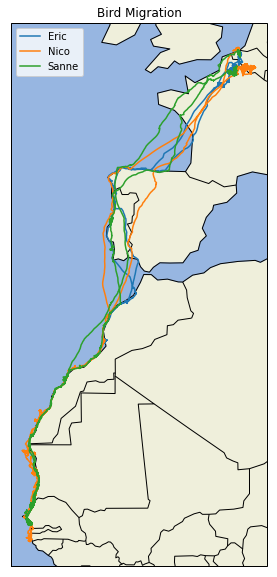

In [9]:
import cartopy.feature as cfeature

# TODO add your code here
# ccrs.Mercator() instead of ccrs.PlateCarree()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())

# TODO 1: comment in/out and see, what happens
# ax.set_extent((-25,20,52,10))

# TODO 2: draw the single tracks with title and legend as in Exercise 2
for name in unique_names:
    bird = birds[birds.bird_name==name]
    plt.plot(bird.longitude,bird.latitude,label=name, transform=ccrs.Geodetic())
    
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

plt.legend()
plt.title('Bird Migration');